In [172]:
library(tidyverse)
library(reshape)
library(reshape2)
library(pheatmap)

In [89]:
male <- read.delim("macho_modified.csv", h=T)
rownames(male) <- male$Group
male <- male[,-1]

female <- read.delim("femea_modified.csv", h=T)
rownames(female) <- female$Group
female <- female[,-1]

In [90]:
male_melt <- melt(t(male))
male_df <- data.frame(Group = gsub("\\..*", "", gsub(".plus.binge", "_plusbinge", male_melt$X1)),
                      Pathway = male_melt$X2,
                      RelativeAbundance = gsub("\\,", "\\.", male_melt$value))

female_melt <- melt(t(female))
female_df <- data.frame(Group = gsub("\\..*", "", gsub(".plus.binge", "_plusbinge", female_melt$X1)),
                        Pathway = female_melt$X2,
                        RelativeAbundance = gsub("\\,", "\\.", female_melt$value))                      

In [125]:
unique_pathways <- unique(male_df$Pathway)
signif_male <- NULL

for(i in 1:length(unique_pathways)){
    selected <- male_df[grep(unique_pathways[i], male_df$Pathway),]
    stats <- pairwise.wilcox.test(as.numeric(as.vector(selected$RelativeAbundance)), 
                                  selected$Group, 
                                  p.adjust.method = "bonferroni")
    statstable <- melt(stats$p.value)
    signif_df <- data.frame(Pathway = unique_pathways[i], Nsignif = length(which(statstable$value <= 0.05)))
    signif_male <- rbind(signif_male, signif_df)
}

unique_pathways <- unique(female_df$Pathway)
signif_female <- NULL

for(i in 1:length(unique_pathways)){
    selected <- female_df[grep(unique_pathways[i], female_df$Pathway),]
    stats <- pairwise.wilcox.test(as.numeric(as.vector(selected$RelativeAbundance)), 
                                  selected$Group, 
                                  p.adjust.method = "bonferroni")
    statstable <- melt(stats$p.value)
    signif_df <- data.frame(Pathway = unique_pathways[i], Nsignif = length(which(statstable$value <= 0.05)))
    signif_female <- rbind(signif_female, signif_df)
}

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning me

“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot co

“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot co

In [123]:
#Number statistical significant features/functions MALE

dim(signif_male[which(signif_male$Nsignif != 0),])

[1] 26  2

In [199]:
signif_male[which(signif_male$Nsignif != 0),]

,Pathway,Nsignif
6,Alzheimer's disease,1
7,Amino acid metabolism,1
23,Bacterial secretion system,2
32,Biosynthesis of unsaturated fatty acids,2
41,Carbohydrate digestion and absorption,1
53,Chlorocyclohexane and chlorobenzene degradation,1
56,Cyanoamino acid metabolism,1
57,Cysteine and methionine metabolism,2
62,Dioxin degradation,2
68,Electron transfer carriers,2


In [124]:
#Number statistical significant features/functions FEMALE

dim(signif_female[which(signif_female$Nsignif != 0),])

[1] 67  2

In [201]:
signif_female[which(signif_female$Nsignif != 0),]

,Pathway,Nsignif
10,Aminoacyl-tRNA biosynthesis,1
20,Bacterial chemotaxis,1
22,Bacterial motility proteins,2
24,Bacterial toxins,1
26,Benzoate degradation,1
27,beta-Alanine metabolism,1
29,Biosynthesis and biodegradation of secondary metabolites,2
30,Biosynthesis of ansamycins,1
32,Biosynthesis of unsaturated fatty acids,1
39,C5-Branched dibasic acid metabolism,3


In [147]:
unique_pathways <- unique(male_df$Pathway)
groups <- unique(male_df$Group)
stats_malefemale <- NULL

for(i in 1:length(unique_pathways)){
    selectedMale <- male_df[grep(unique_pathways[i], male_df$Pathway),]
    selectedMale$Gender <- "male"
    selectedFemale <- female_df[grep(unique_pathways[i], female_df$Pathway),]
    selectedFemale$Gender <- "female"

    selectedMaleFemale <- rbind(selectedMale, selectedFemale)

    for(j in 1:length(groups)){
        selectedGroup <- selectedMaleFemale[grep(groups[j], selectedMaleFemale$Group),]
        stats <- pairwise.wilcox.test(as.numeric(as.vector(selectedGroup$RelativeAbundance)), 
                                      selectedGroup$Gender, 
                                      p.adjust.method = "none")
        statstable <- melt(stats$p.value)
        signif_df <- data.frame(Pathway = unique_pathways[i], 
                                Group = groups[j],
                                Pvalue = statstable$value)
        stats_malefemale <- rbind(stats_malefemale, signif_df)}}

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning me

In [178]:
stats_malefemale_matrix <- cast(stats_malefemale, Pathway~Group)
rownames(stats_malefemale_matrix) <- stats_malefemale_matrix$Pathway
stats_malefemale_matrix <- stats_malefemale_matrix[,-1]

Using Pvalue as value column.  Use the value argument to cast to override this choice


In [184]:
selectedmatrix <- stats_malefemale_matrix[which(apply(stats_malefemale_matrix <= 0.05, 1, sum) > 0),]

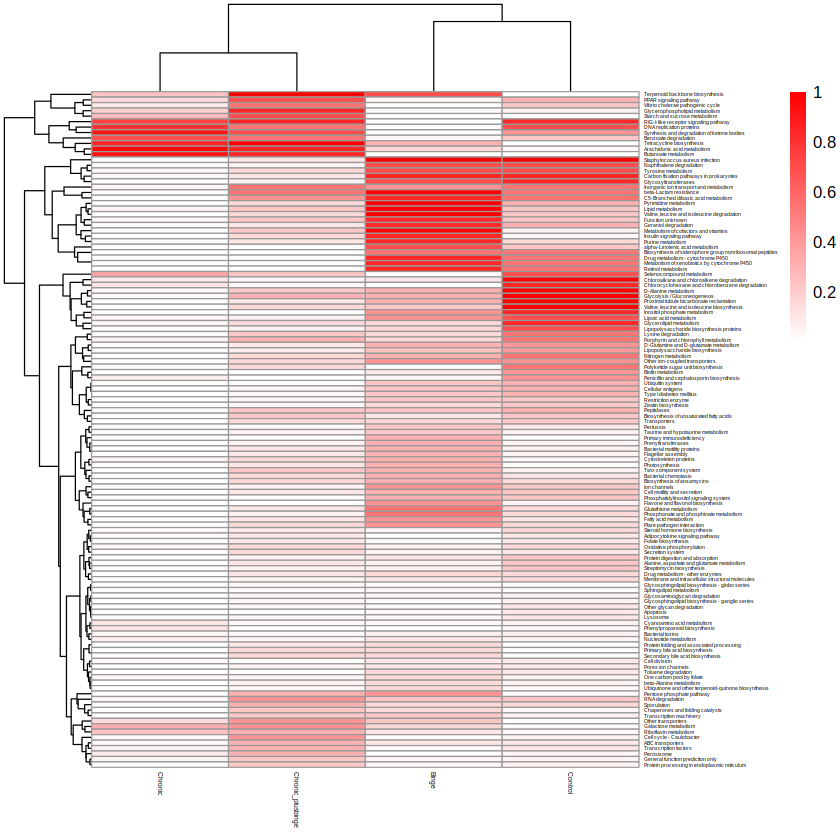

In [197]:
pheatmap(selectedmatrix, display_numbers = F, 
         color = colorRampPalette(c('white','red'))(100), 
         cluster_rows = T, cluster_cols = T,  fontsize_row = 3, fontsize_col = 4)